In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [5]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 127s 324ms/step - loss: 0.5806 - accuracy: 0.6964 - val_loss: 0.6253 - val_accuracy: 0.6063
Epoch 2/10
391/391 [==============================] - 125s 320ms/step - loss: 0.4358 - accuracy: 0.8136 - val_loss: 0.4881 - val_accuracy: 0.7912
Epoch 3/10
391/391 [==============================] - 124s 318ms/step - loss: 0.3556 - accuracy: 0.8579 - val_loss: 0.4799 - val_accuracy: 0.8040
Epoch 4/10
391/391 [==============================] - 124s 318ms/step - loss: 0.2940 - accuracy: 0.8856 - val_loss: 0.4311 - val_accuracy: 0.8320
Epoch 5/10
391/391 [==============================] - 125s 319ms/step - loss: 0.2166 - accuracy: 0.9208 - val_loss: 0.4412 - val_accuracy: 0.8274
Epoch 6/10
391/391 [==============================] - 125s 319ms/step - loss: 0.2657 - accuracy: 0.8986 - val_loss: 0.4937 - val_accuracy: 0.8212
Epoch 7/10
391/391 [==============================] - 125s 320ms/step - loss: 0.1785 - accuracy: 0.9370 - val_loss: 0.4631 -

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

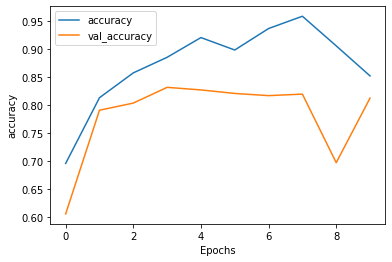

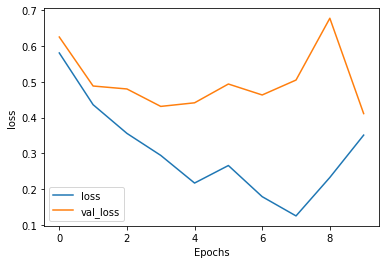

In [15]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [17]:
!git add .
!git commit -m "Saving file after training"
!git push

[master 04f482e] Saving file after training
 1 file changed, 50 insertions(+), 7 deletions(-)
Counting objects: 6, done.
Delta compression using up to 32 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 35.00 KiB | 17.50 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:arjun921/DeepLearning-Journal.git
   48a9e4d..04f482e  master -> master
